# Bike Thefts Berlin - EDA

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils.ipynb import BikeThefts

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'utils'

In [30]:
PATH_INITIAL = './data/Fahrraddiebstahl.csv' 
PATH_SAVEABLE = '../data'
PATH_EXTRACTED = './data'

In [3]:
time_parsable = ['TATZEIT_ANFANG_DATUM', 'TATZEIT_ENDE_DATUM']

## Prep data inspection

In [4]:
class BikeThefts():
    '''Read, inspect and transform initial data.'''

    def __init__(self, path = PATH_INITIAL, path_saveable = PATH_SAVEABLE, path_extracted = PATH_EXTRACTED) -> None:
        self.path = path
        self.path_saveable = path_saveable
        self.path_extracted = path_extracted

    def read_initial_data(self) -> pd.DataFrame:
        '''Return DataFrame with feature matrix and labels as values.'''
        df = pd.read_csv(self.path, index_col=0, parse_dates=True, encoding = 'unicode_escape')
        return df

    def read_extracted_data(self, file) -> pd.DataFrame:
        '''Return DataFrame extracted from initial data.'''
        df = pd.read_csv(f'{self.path_extracted}/{file}', encoding = 'unicode_escape')
        return df
    
    def check_unique(self, serie) -> pd.Series:
        '''Return unique values of selected columns.'''
        return serie.unique()

    def include_timestamps(self, df) -> pd.DataFrame:
        '''Return DataFrame with time-stamps.'''
        df['year'] = df.index.year
        df['month'] = df.index.month
        return df

    def time_parser(self, df, time_parsables) -> pd.DataFrame:
        '''Parse columns encoded as strings to datetime-objects.'''
        for col in time_parsables:
            df[col] = pd.to_datetime(df[col])
        return df

    def crime_duration_days(self, df, start, end) -> pd.DataFrame:
        '''Calculate duration of crime in days.'''
        df['crime_duration_days'] = end - start
        return df
    
    def crime_duration_hours(self, df, start, end) -> pd.DataFrame:
        '''Calculate duration of crime in hours.'''
        df['crime_duration_hours'] = abs(start - end)
        return df
    
    def plot_categoricals(self, df) -> sns:
        return sns.catplot(
        data=df, y='ART_DES_FAHRRADS', kind="count",
        palette="pastel", edgecolor=".6",
    )

    def save_data(self, df, group_by, col_names):
        '''Save extracted data locally as csv-file.'''
        bike_thefts_LOR = pd.DataFrame(df.groupby(group_by).size(),
                        columns = [col_names]).reset_index()
        return bike_thefts_LOR.to_csv(f'{self.path_saveable}/bike_thefts_LOR.csv')

## Inspect

In [5]:
bike_thefts = BikeThefts()

In [6]:
df = bike_thefts.read_initial_data()
df.head()

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
ANGELEGT_AM,,,,,,,,,,
2023-02-19,18.02.2023,18,19.02.2023,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,20,19.02.2023,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,16,19.02.2023,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,18.02.2023,17,19.02.2023,0,7601544,1849,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2023-02-19,17.02.2023,17,17.02.2023,17,3601346,1863,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [7]:
#df_extracted = bike_thefts.read_extracted_data('bike_thefts_LOR.csv')

In [8]:
df.info() # dates are encoded as strings

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24610 entries, 2023-02-19 to 2022-01-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TATZEIT_ANFANG_DATUM   24610 non-null  object
 1   TATZEIT_ANFANG_STUNDE  24610 non-null  int64 
 2   TATZEIT_ENDE_DATUM     24610 non-null  object
 3   TATZEIT_ENDE_STUNDE    24610 non-null  int64 
 4   LOR                    24610 non-null  int64 
 5   SCHADENSHOEHE          24610 non-null  int64 
 6   VERSUCH                24610 non-null  object
 7   ART_DES_FAHRRADS       24610 non-null  object
 8   DELIKT                 24610 non-null  object
 9   ERFASSUNGSGRUND        24610 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [9]:
df.isna().sum().sum()

0

In [10]:
bike_thefts.check_unique(df['DELIKT'])

array(['Fahrraddiebstahl', 'Keller- und Bodeneinbruch'], dtype=object)

In [11]:
bike_thefts.check_unique(df['ART_DES_FAHRRADS'])

array(['Herrenfahrrad', 'Damenfahrrad', 'Mountainbike',
       'diverse Fahrräder', 'Fahrrad', 'Kinderfahrrad', 'Rennrad',
       'Lastenfahrrad'], dtype=object)

In [12]:
len(bike_thefts.check_unique(df['LOR']))

540

In [13]:
bike_thefts.check_unique(df['VERSUCH']) 

array(['Nein', 'Unbekannt', 'Ja'], dtype=object)

In [14]:
len(df[df['VERSUCH']== 'Unbekannt']) # decision: include or drop?

5

In [15]:
bike_thefts.check_unique(df['ERFASSUNGSGRUND'])

array(['Sonstiger schwerer Diebstahl von Fahrrädern',
       'Einfacher Diebstahl von Fahrrädern',
       'Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern',
       'Einfacher Diebstahl aus Keller/Boden von Fahrrädern'],
      dtype=object)

## Transform

In [16]:
df_transformed = bike_thefts.time_parser(df, time_parsable)
df_transformed = bike_thefts.include_timestamps(df_transformed)
df_transformed.head(3)

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,year,month
ANGELEGT_AM,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2
2023-02-19,2023-02-18,16,2023-02-19,0,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2


In [17]:
df_transformed = bike_thefts.crime_duration_days(df_transformed, 
                                            start=df_transformed['TATZEIT_ANFANG_DATUM'], 
                                            end = df_transformed['TATZEIT_ENDE_DATUM'])

In [18]:
df_transformed = bike_thefts.crime_duration_hours(df_transformed, 
                                            start=df_transformed['TATZEIT_ANFANG_STUNDE'], 
                                            end = df_transformed['TATZEIT_ENDE_STUNDE'])
df_transformed.head(2)

,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,year,month,crime_duration_days,crime_duration_hours
ANGELEGT_AM,,,,,,,,,,,,,,
2023-02-19,2023-02-18,18,2023-02-19,7,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2,1 days,11
2023-02-19,2023-02-18,20,2023-02-19,9,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2,1 days,11


In [19]:
df_transformed.drop(df_transformed.iloc[:, 0:4], axis=1, inplace=True)
df_transformed.columns

Index(['LOR', 'SCHADENSHOEHE', 'VERSUCH', 'ART_DES_FAHRRADS', 'DELIKT',
       'ERFASSUNGSGRUND', 'year', 'month', 'crime_duration_days',
       'crime_duration_hours'],
      dtype='object')

In [20]:
df_transformed.head(3)

,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,year,month,crime_duration_days,crime_duration_hours
ANGELEGT_AM,,,,,,,,,,
2023-02-19,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2,1 days,11
2023-02-19,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2,1 days,11
2023-02-19,6100102,746,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2,1 days,16


In [21]:
bike_thefts.check_unique(df_transformed['crime_duration_hours'])  # check: can this be so long?

array([11, 16, 17,  0, 10, 22,  4,  1,  9,  2,  7,  5,  3,  6, 23,  8, 20,
       14, 12, 13, 15, 19, 18, 21])

In [22]:
df_transformed.reset_index(inplace=True)
# df_transformed.index
# df_transformed.drop(['level_0', 'index'], axis=1, inplace=True)
df_transformed.head(2)

,ANGELEGT_AM,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND,year,month,crime_duration_days,crime_duration_hours
0,2023-02-19,3701658,3472,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2,1 days,11
1,2023-02-19,1100308,2277,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,2023,2,1 days,11


In [32]:
# bike_thefts_LOR_year = df_transformed[['LOR', 'year']]
bike_thefts_LOR_year = pd.DataFrame(df_transformed.groupby(['LOR', 'year']).size(),
                       columns = ['bike_theft_count'])
bike_thefts_LOR_year = bike_thefts_LOR_year.reset_index()
bike_thefts_LOR_year = bike_thefts_LOR_year.set_index('year')
bike_thefts_LOR_year.index
#bike_thefts_LOR_year.to_csv(f'{PATH_SAVEABLE}/bike_thefts_LOR_year.csv')

Int64Index([2022, 2023, 2022, 2023, 2022, 2023, 2022, 2023, 2022, 2023,
            ...
            2022, 2022, 2022, 2023, 2022, 2023, 2022, 2023, 2022, 2022],
           dtype='int64', name='year', length=960)

## Plot

Plan:
- parse relevant time-related cols to datetime so that you can calculate time periods. Done
- group by: district and plot n(thefts). Done
- plot thru time
- check distributions
- check correlations
- check for time gaps, and interpolate them

In [ ]:
bike_thefts_LOR = pd.DataFrame(df.groupby('LOR').size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_LOR.to_csv(f'{PATH_SAVEABLE}/bike_thefts_LOR.csv')

In [ ]:
bike_thefts_LOR_month = pd.DataFrame(df_transformed.groupby(['month','LOR']).size(),
                       columns = ['bike_theft_count'])
bike_thefts_LOR.to_csv(f'{PATH_SAVEABLE}/bike_thefts_LOR_month.csv')

In [ ]:
bike_thefts_LOR_year_month = pd.DataFrame(df_transformed.groupby(['year', 'month']).size(),
                       columns = ['bike_theft_count']).reset_index()
bike_thefts_LOR_year_month.head(3)

In [ ]:
bike_thefts_LOR_series = df_transformed[['LOR', 'count_bike_thefts']]
#bike_thefts_LOR_series.to_csv(f'{PATH_SAVEABLE}/bike_thefts_LOR_series.csv')

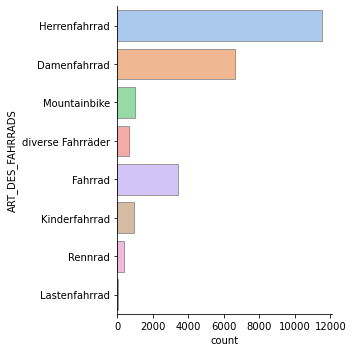

In [34]:
bike_thefts.plot_categoricals(df, 'ART_DES_FAHRRADS');

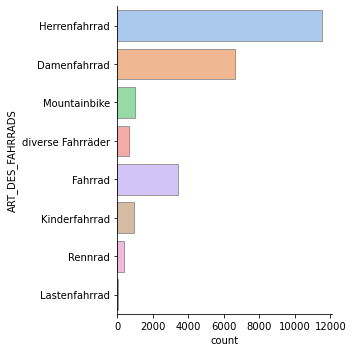

In [36]:
sns.catplot(
        data=df, y='ART_DES_FAHRRADS', kind="count",
        palette="pastel", edgecolor=".6",
        );

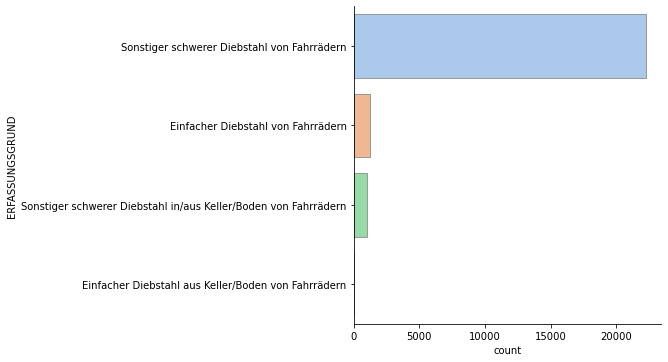

In [37]:
bike_thefts.plot_categoricals(df, 'ERFASSUNGSGRUND');

In [ ]:
plot_time = pd.DataFrame(df_transformed.groupby(['ANGELEGT_AM', 'LOR']).size(),
                       columns = ['bike_theft_count']).reset_index()
plot_time.head(3)

In [ ]:
# group_crime_type = df.groupby(['Year'])['SCHADENSHOEHE'].mean()
# plot_crime_type = group_crime_type.plot()
# plt.xticks(rotation=45)
# plot_crime_type;

## EDA - features

In [ ]:
p4 = df.groupby(["Year","Month"])["n(Loans)_Outstanding_Other"].mean().plot() 
plt.xticks(rotation=45)
p4

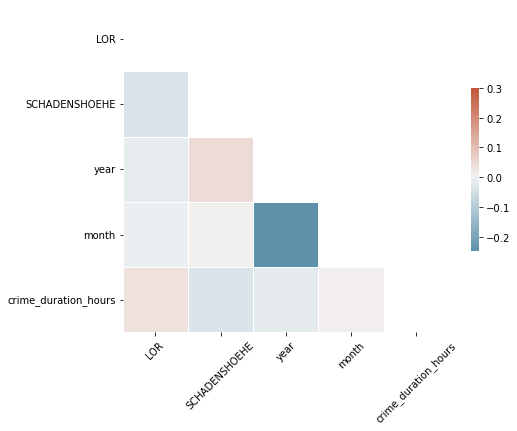

In [40]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=45)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Checking for duplicates

In [ ]:
df2 = df.groupby(["Client_Status_Post3Months"]).agg({"Client_ID" : "nunique", "Resident_Capital" : "count"})
df2 = df2.reset_index()
df2 = df2.rename(columns={"Client_ID" : "Unique_Frequency", "Resident_Capital" : "Frequency"})
df2

In [ ]:
check_duplicates = np.array(df2)
check_duplicates

In [ ]:
prop_duplicates = check_duplicates[0,1]/check_duplicates[0,2]*100
prop_duplicates

Confirming high number of duplicates. Need to extract them.

In [ ]:
df_unique = df.drop_duplicates(subset="Client_ID", keep="first") 

In [ ]:
df_unique.info()

=> data set reduced by one third after dropping duplicates!

In [ ]:
y.value_counts()/df_unique.shape[0]

In [ ]:
df_unique.to_csv("Tabla_01_English_Unique_postEDA.csv")